 ## Advanced Regression Assignment

In [24]:
#Importing libraries

#Basic libraries
import pandas as pd
import numpy as np
import os
# handling warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics

#Statistics
from scipy import stats
from scipy.stats import norm, skew 


 ##  Data Understanding

In [25]:
#Read the data from CSV
housing_df=pd.read_csv("train.csv")

In [26]:
# Check the data
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
# check the no. of rows and columns
housing_df.shape

(1460, 81)

In [28]:
#Data info
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
#Summary of the data
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
# Null value check
housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

 ##  Treating missing values 

In [31]:
#Checking the number of missing values and its percentage
Total_missing = housing_df.isnull().sum().sort_values(ascending = False)

Total_missing_Perc = (100*housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False)

df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])

df_missing_values.head(80)

,Total_missing_values,Percent_missing_values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [32]:
# Checking how many columns have more than 45% of missing data

print('Total no of columns with missing values more than 45% : {}'.format(df_missing_values[df_missing_values['Percent_missing_values'] >= 45].shape[0]))

Total no of columns with missing values more than 45% : 5


Dropping these 5 columns which have more than 45% of the missing data.

In [33]:
#Create a new dataframe named df_cleaned with all columns with data missing < 45% for our  further analysis

df_cleaned = housing_df.loc[:,(100 * housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False) < 45]
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Imputing other missing values columns

In [34]:
#Checking the no of unique values in each column
df_cleaned.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [35]:
# Get the value counts of all the columns

for column in df_cleaned:
    
    print(df_cleaned[column].astype('category').value_counts())
    print('___________________________________________________')

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
___________________________________________________
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
___________________________________________________
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
___________________________________________________
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
63.0      17
79.0      17
55.0      17
72.0      17
100.0     16
51.0      15
74.0      15
66.0      15
52.0      14
59.0      13
71.0      12
82.0      12
57.0      12
67.0      12
43.0      12
40.0      12
76

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
___________________________________________________
0    913
1    535
2     12
Name: HalfBath, dtype: int64
___________________________________________________
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
___________________________________________________
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
___________________________________________________
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
___________________________________________________
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64
___________________________________________________
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
__________________________________________

#### Data imputation for categorical columns

In [37]:
df_cleaned.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [38]:
# Most of the values are TA, so we can map the NAN values of 'GarageQual' to TA -MODE
df_cleaned['GarageQual'] = df_cleaned['GarageQual'].replace(np.nan,'TA')

In [39]:
df_cleaned['GarageQual'].dtype

dtype('O')

In [40]:
df_cleaned.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [42]:
df_cleaned.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

As all the values are almost evenly distributed it would be not right to replace null with mode.So creating a new category names unknown

In [43]:
df_cleaned['GarageFinish']=df_cleaned['GarageFinish'].replace(np.nan,'Unknown')

In [44]:
df_cleaned.GarageFinish.value_counts()

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

In [45]:
df_cleaned.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [46]:
# Most of the values are ATTCHD , so we can map the NAN values of 'GarageType' to ATTCHD (MODE)
df_cleaned['GarageType'] = df_cleaned['GarageType'].replace(np.nan,'Attchd')

In [47]:
df_cleaned.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [49]:
df_cleaned.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [50]:
# Most of the values is TA , so we can map the NAN values of 'GarageCond' to TA -MODE
df_cleaned['GarageCond'] = df_cleaned['GarageCond'].replace(np.nan,'TA')

In [51]:
df_cleaned.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

#### Data imputation for numerical columns

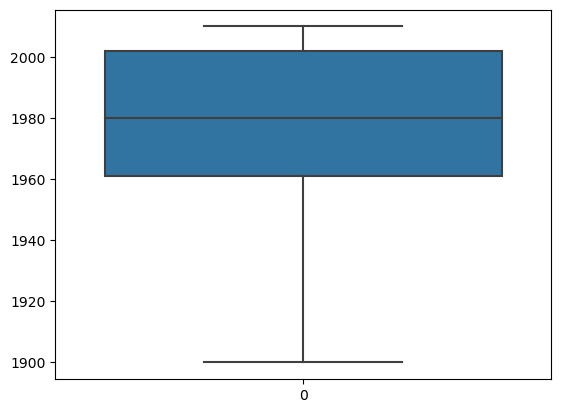

In [53]:
#Plots for outlier analysis of GarageYrBlt
sns.boxplot(df_cleaned.GarageYrBlt)
plt.show()

There are no outiers thus imputing the missing values with mean

In [54]:
df_cleaned['GarageYrBlt'].fillna(df_cleaned['GarageYrBlt'].mean(),inplace=True)

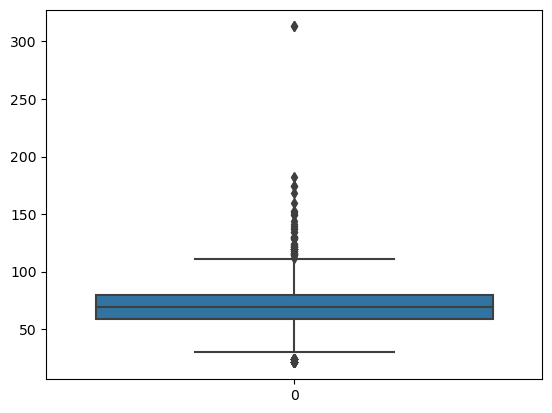

In [56]:
#Plot for outlier analysis for LotFrontage
sns.boxplot(df_cleaned.LotFrontage)
plt.show()

As there are outliers imputing with median

In [57]:
df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median(),inplace=True)

In [58]:
# As the other columns have less than 3% of NAN Values we chose to drop those rows .

df_cleaned.dropna(inplace=True)

In [59]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
Id,0,0.0
FullBath,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
BsmtHalfBath,0,0.0


### All missing values are handled

##  Exploratory data analysis

In [60]:
df_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

There are four columns which gives us details about the years of the construction. Deriving a new column Age of building and dropping the other columns. we take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built

In [61]:
df_cleaned['Age']=df_cleaned['YrSold']-df_cleaned['YearRemodAdd']
df_cleaned['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [62]:
df_cleaned=df_cleaned.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [63]:
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,WD,Normal,250000,8


Dropping the Id as it does not give any infomration

In [64]:
df_cleaned=df_cleaned.drop(['Id'], axis = 1) 

### Numerical columns of our data set

In [65]:
numeric_feats = df_cleaned.dtypes[df_cleaned.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

### Univariate analysis of numerical columns

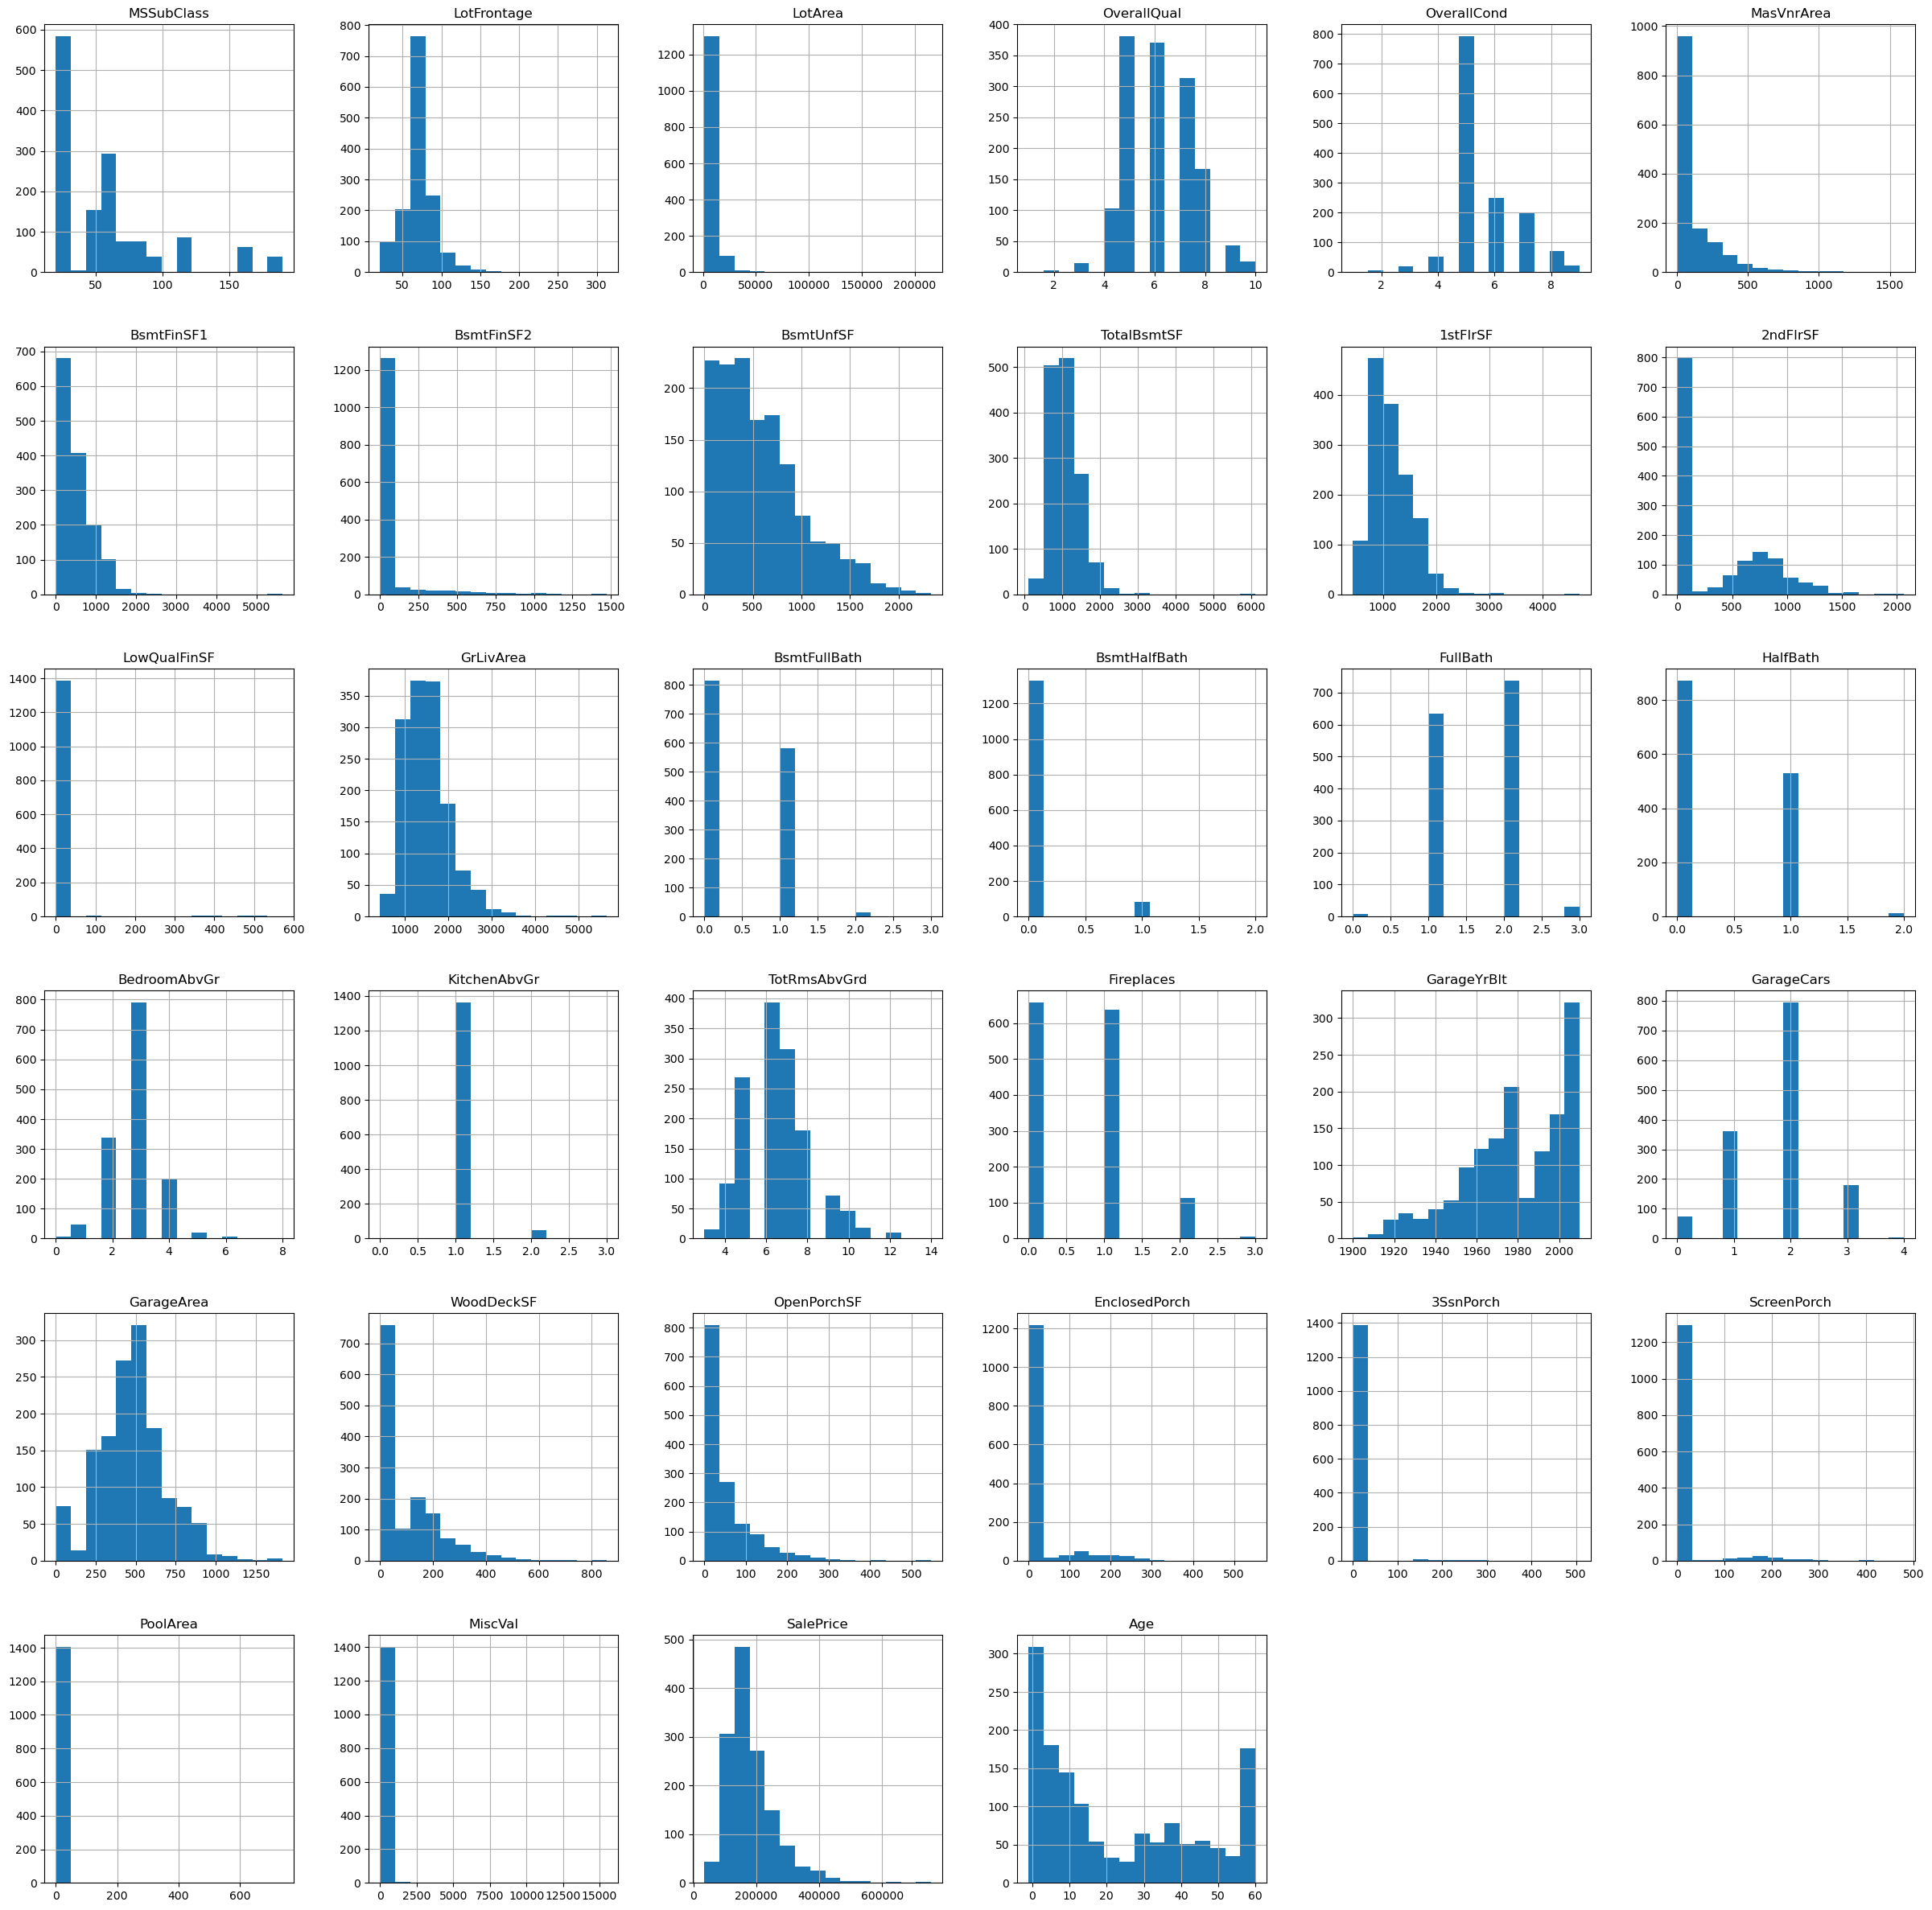

In [66]:
df_cleaned[numeric_feats].hist(bins=15, figsize=(30, 30))
plt.show()

### We see that few variables are highly skewed and there might be a possiblity that they can be correlated with each other



In [67]:
# correlation matrix
cor = df_cleaned.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
MSSubClass,1.000000,-0.359784,-0.138298,0.038952,-0.063240,0.023024,-0.067783,-0.064875,-0.139572,-0.253332,...,-0.094523,-0.014568,-0.005684,-0.016768,-0.041226,-0.026202,0.008496,-0.022705,-0.082281,-0.045620
LotFrontage,-0.359784,1.000000,0.303055,0.232893,-0.055121,0.179106,0.214046,0.040468,0.118356,0.385093,...,0.324805,0.073858,0.133934,0.012227,0.064597,0.036986,0.181510,-0.000569,0.333348,-0.078883
LotArea,-0.138298,0.303055,1.000000,0.104763,-0.002941,0.104010,0.213450,0.111381,-0.008757,0.275637,...,0.180207,0.172281,0.083860,-0.022978,0.021153,0.042818,0.077814,0.041567,0.264803,-0.011599
OverallQual,0.038952,0.232893,0.104763,1.000000,-0.121155,0.409656,0.211652,-0.072897,0.278239,0.509473,...,0.561612,0.230274,0.297678,-0.122678,0.032014,0.059290,0.065474,-0.025344,0.786765,-0.541616
OverallCond,-0.063240,-0.055121,-0.002941,-0.121155,1.000000,-0.134961,-0.057034,0.036885,-0.159769,-0.221992,...,-0.163341,-0.013206,-0.041823,0.075663,0.022557,0.050897,-0.003298,0.070685,-0.093567,-0.054196
MasVnrArea,0.023024,0.179106,0.104010,0.409656,-0.134961,1.000000,0.259291,-0.077978,0.103094,0.371677,...,0.370982,0.157566,0.124018,-0.116271,0.018240,0.059422,0.011161,-0.027143,0.474525,-0.172425
BsmtFinSF1,-0.067783,0.214046,0.213450,0.211652,-0.057034,0.259291,1.000000,-0.060807,-0.551475,0.504307,...,0.288913,0.196236,0.098352,-0.109122,0.028958,0.057169,0.141557,0.009120,0.368849,-0.109209
BsmtFinSF2,-0.064875,0.040468,0.111381,-0.072897,0.036885,-0.077978,-0.060807,1.000000,-0.229907,0.086766,...,-0.025604,0.065614,0.002020,0.037693,-0.030142,0.087231,0.041342,0.006542,-0.020196,0.078440
BsmtUnfSF,-0.139572,0.118356,-0.008757,0.278239,-0.159769,0.103094,-0.551475,-0.229907,1.000000,0.367804,...,0.170188,-0.022720,0.118343,-0.003900,0.023565,-0.021628,-0.038245,-0.017937,0.188959,-0.161609
TotalBsmtSF,-0.253332,0.385093,0.275637,0.509473,-0.221992,0.371677,0.504307,0.086766,0.367804,1.000000,...,0.498678,0.222698,0.239398,-0.111764,0.045885,0.076152,0.134601,-0.006489,0.611084,-0.265902


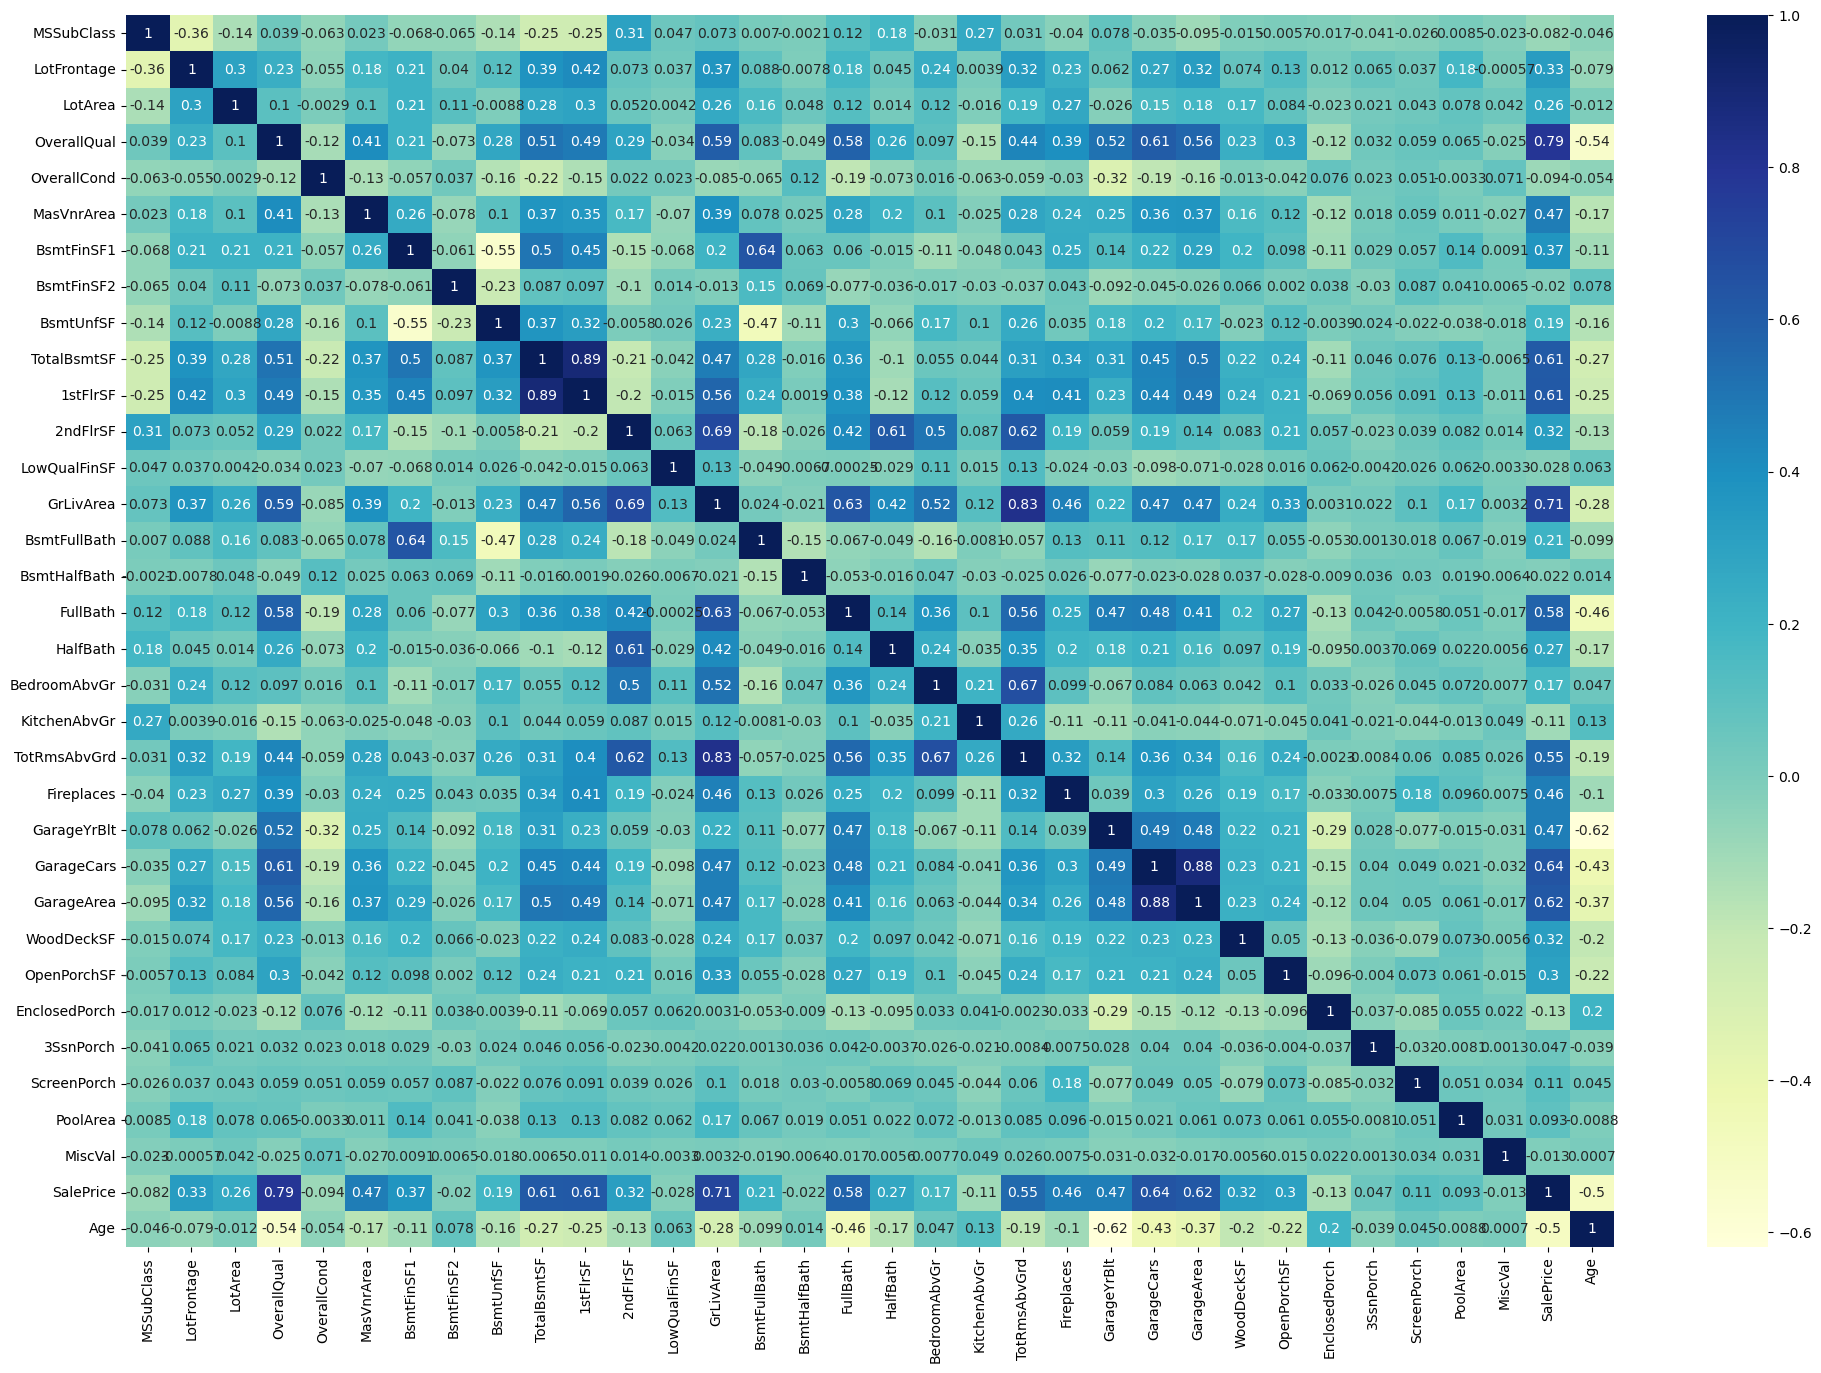

In [68]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


Inferences: 

- SalePrice is positively correlated to the Overall Quality(0.79)
- SalePrice is positively correlated to the 1stFlrSF (0.61)
- SalePrice is positively correlated to the TotalBsmtSF (0.61)
- SalePrice is positively correlated to the GrLivArea (0.71)
- SalePrice is positively correlated to the FullBath(0.58)
- SalePrice is positively correlated to the TotRmsAbvGrd(0.55)
- SalePrice is positively correlated to the GarageCars(0.64)
- SalePrice is positively correlated to the GarageArea(0.62)
- SalePrice is negatively correlated to the Age(-0.5)

### Bivariate analysis of these top 10 correlated variables with saleprice using pairplot

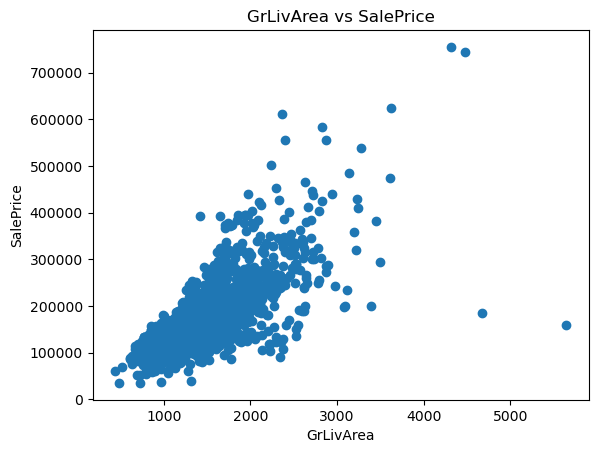

In [69]:
plt.scatter(df_cleaned.GrLivArea, df_cleaned.SalePrice)

plt.title('GrLivArea vs SalePrice')

plt.xlabel('GrLivArea')

plt.ylabel('SalePrice')

plt.show()

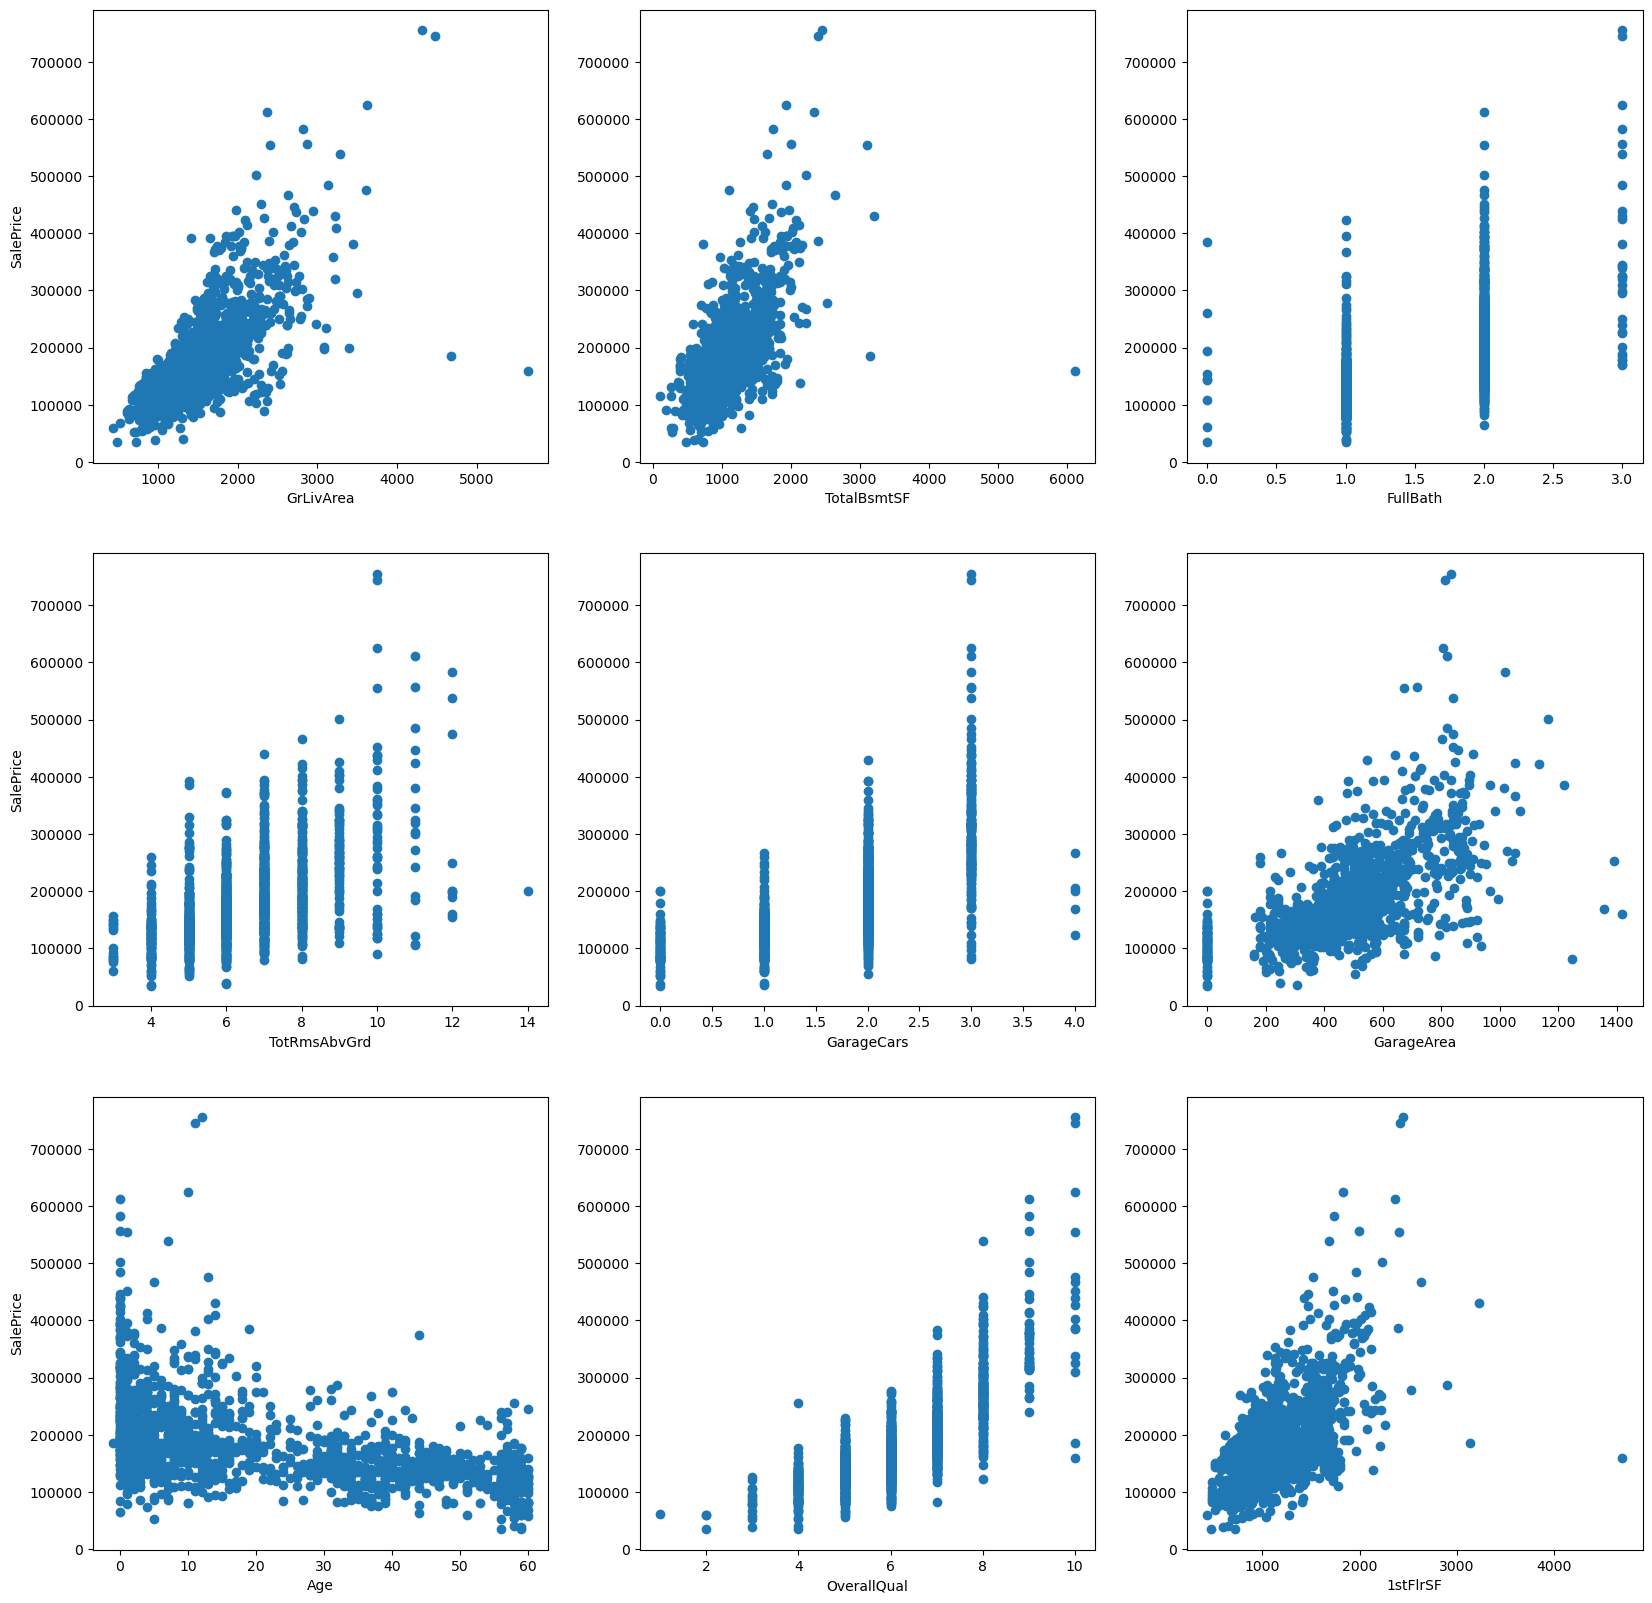

In [70]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(df_cleaned.GrLivArea, df_cleaned.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(df_cleaned.TotalBsmtSF, df_cleaned.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(df_cleaned.FullBath, df_cleaned.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(df_cleaned.TotRmsAbvGrd, df_cleaned.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(df_cleaned.GarageCars, df_cleaned.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(df_cleaned.GarageArea, df_cleaned.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(df_cleaned.Age, df_cleaned.SalePrice)
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.subplot(3,3,8)
plt.scatter(df_cleaned.OverallQual, df_cleaned.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)
plt.scatter(df_cleaned['1stFlrSF'], df_cleaned.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

Inferences : 
- We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
- We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to their characteritics. 

### Categorical columns of our data set 

In [71]:
cat_feats  = df_cleaned.dtypes[df_cleaned.dtypes == "object"].index
cat_feats  

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

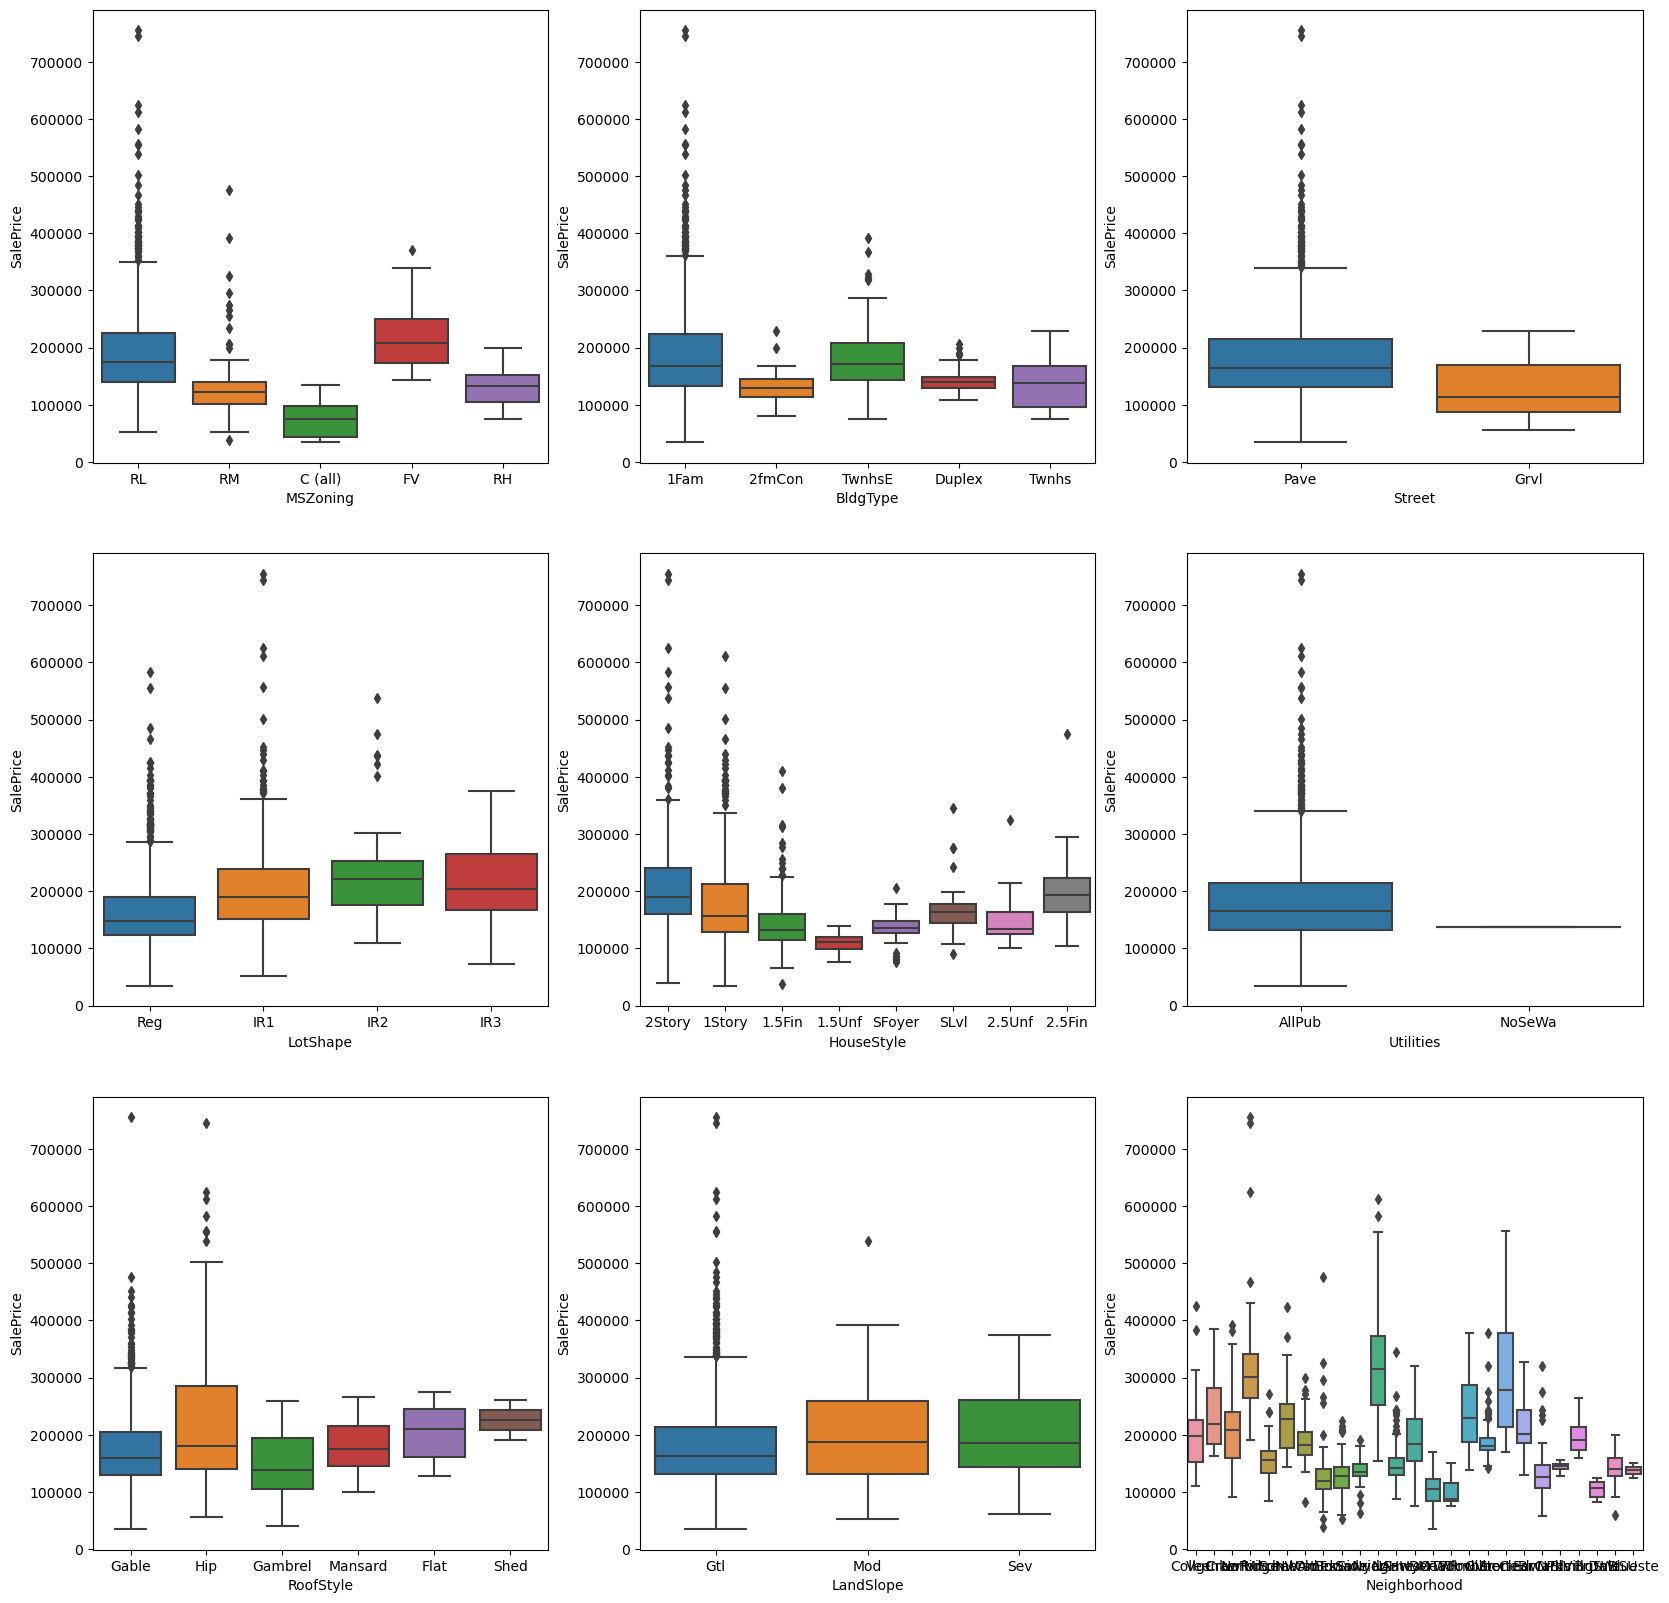

In [72]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=df_cleaned)
plt.show()

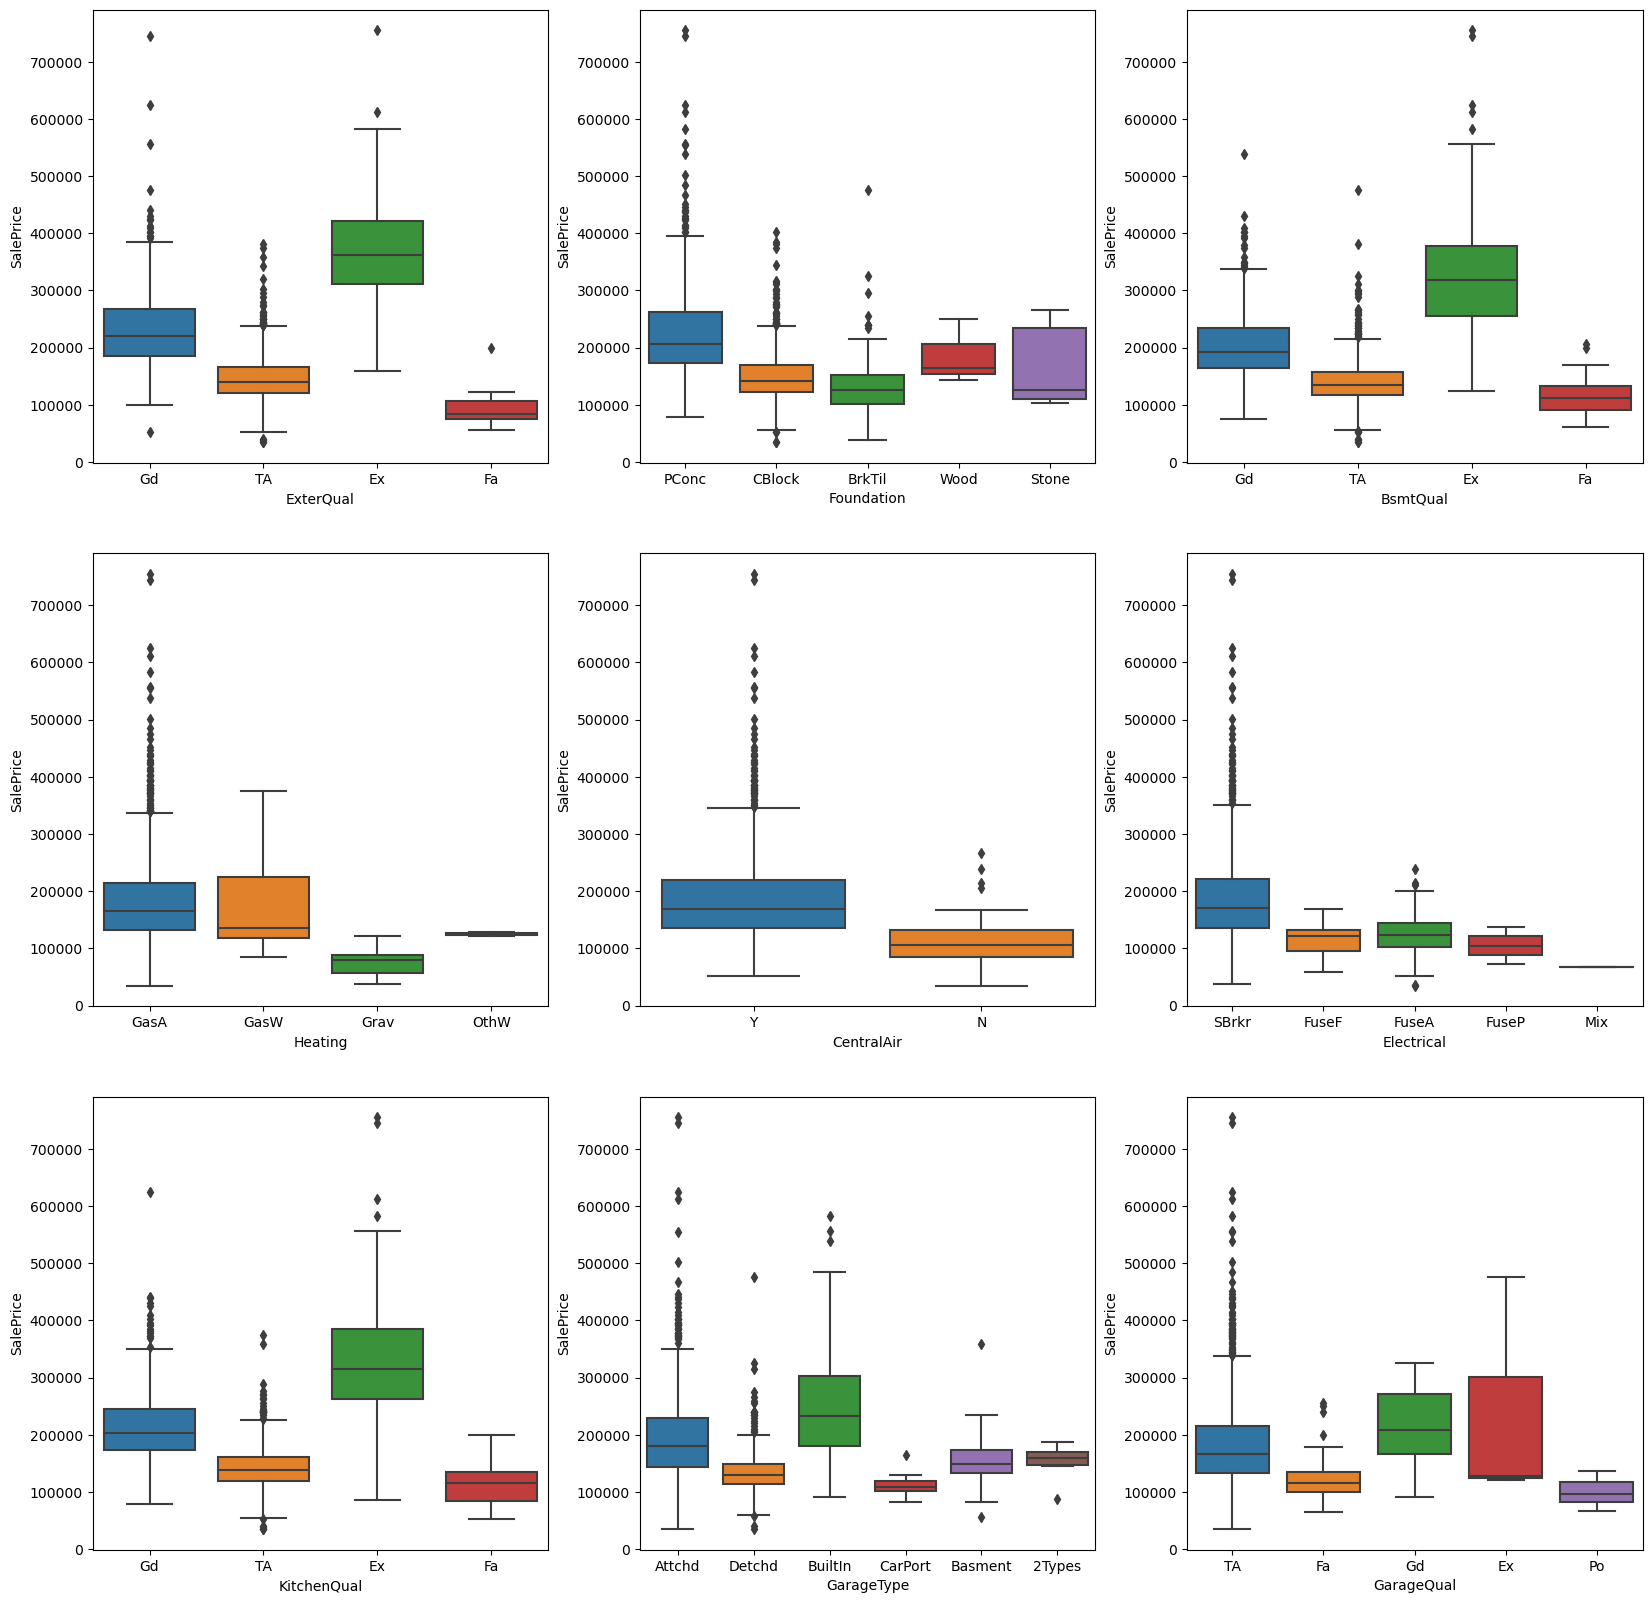

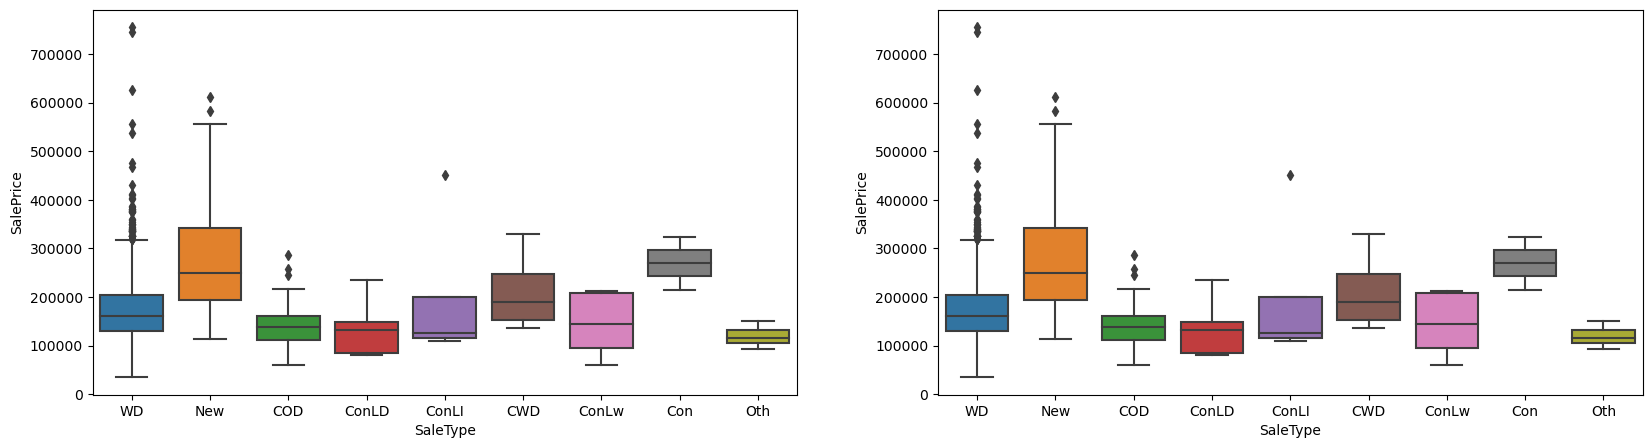

In [73]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=df_cleaned)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=df_cleaned)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=df_cleaned)
plt.show()

Inferences - 
- MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
- The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
- the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
- The house with Exterior Quality of type Execellent has the highest SalePrice.
- The house with Basement Quality of type Execellent has the highest SalePrice.
- The house with Kitchen Quality of type Execellent has the highest SalePrice.
- The house with Garage Quality of type Execellent has the highest SalePrice.
- The house with Garage Type of type BuiltIn has the highest SalePrice.
- The house with Sale Type of type New has the highest SalePrice.
- The Central air of type 'Yes' has more Sale Price when compared to 'No'


##  Data Preprocessing - Transforming the Target variable 

In [74]:
df_cleaned['SalePrice'].describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

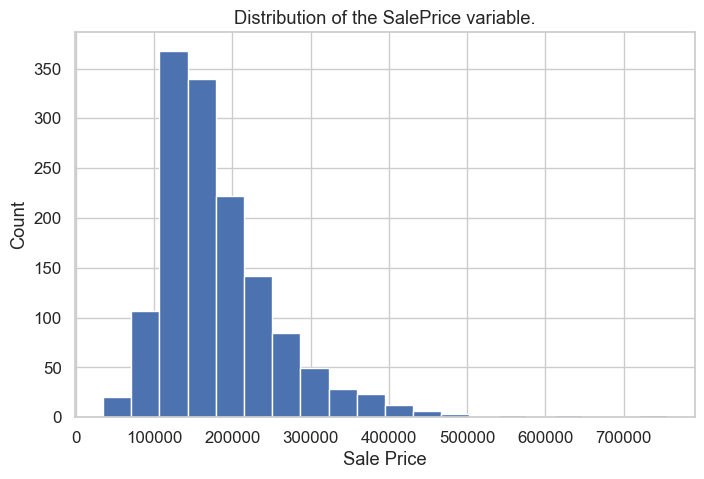

In [75]:
#Check the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(df_cleaned['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()


 mu = 182507.02 and sigma = 79242.34



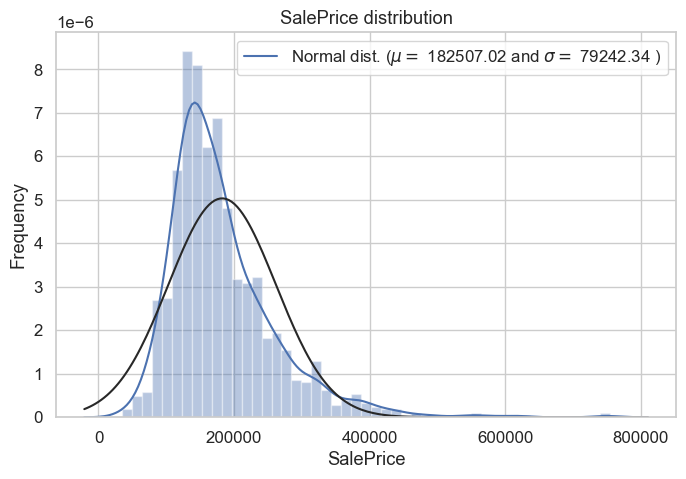

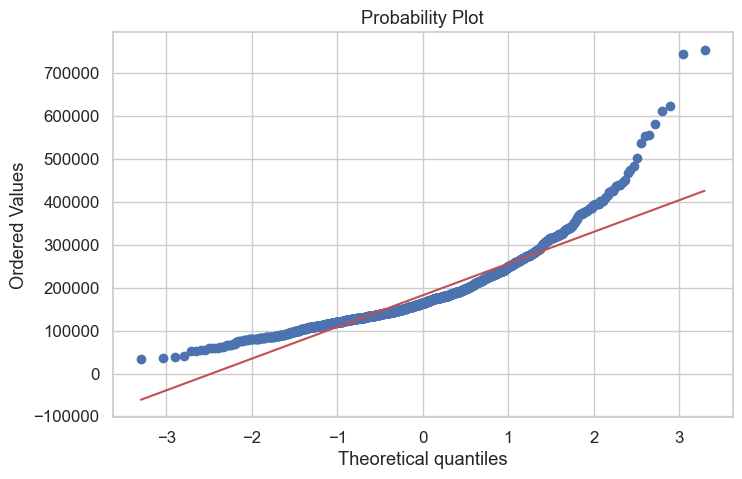

In [76]:
sns.distplot(df_cleaned['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(df_cleaned['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed.We need to transform this variable and make it  normally distributed so using log tranformation method

In [77]:
### Log-transformation of the target variable


 mu = 12.03 and sigma = 0.39



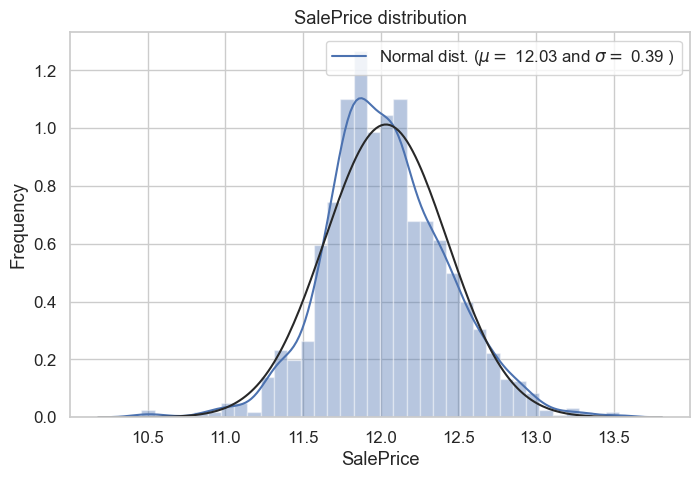

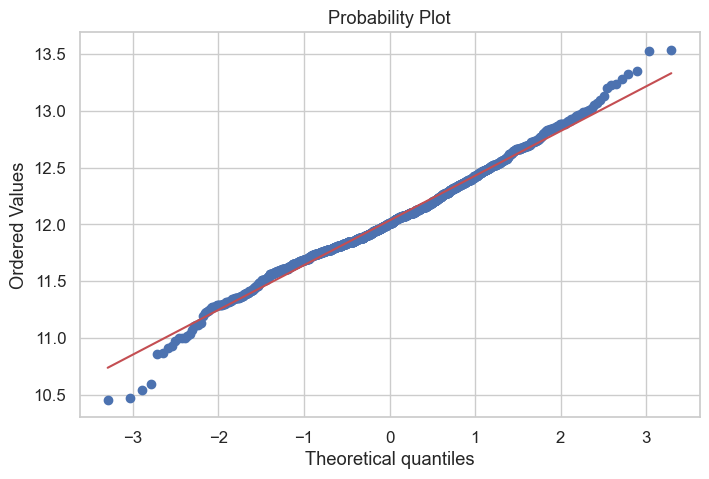

In [78]:
#We use the numpy function log to all elements of the column
df_cleaned["SalePrice"] = np.log(df_cleaned["SalePrice"])

#Checking the new distribution 
sns.distplot(df_cleaned['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(df_cleaned['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.show()

###  Manual Encoding few categorical variables

In [79]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

df_cleaned['ExterQual'] = df_cleaned[['ExterQual']].apply(map_function)
df_cleaned['ExterCond'] = df_cleaned[['ExterCond']].apply(map_function)
df_cleaned['BsmtQual'] = df_cleaned[['BsmtQual']].apply(map_function)
df_cleaned['BsmtCond'] = df_cleaned[['BsmtCond']].apply(map_function)
df_cleaned['BsmtExposure'] = df_cleaned[['BsmtExposure']].apply(map_function1)
df_cleaned['BsmtFinType1'] = df_cleaned[['BsmtFinType1']].apply(map_function2)
df_cleaned['BsmtFinType2'] = df_cleaned[['BsmtFinType2']].apply(map_function2)
df_cleaned['HeatingQC'] = df_cleaned[['HeatingQC']].apply(map_function)
df_cleaned['CentralAir'] = df_cleaned[['CentralAir']].apply(map_function3)
df_cleaned['KitchenQual'] = df_cleaned[['KitchenQual']].apply(map_function)
df_cleaned['Functional'] = df_cleaned[['Functional']].apply(map_function4)
df_cleaned['GarageFinish'] = df_cleaned[['GarageFinish']].apply(map_function5)
df_cleaned['GarageQual'] = df_cleaned[['GarageQual']].apply(map_function)
df_cleaned['GarageCond'] = df_cleaned[['GarageCond']].apply(map_function)
df_cleaned['PavedDrive'] = df_cleaned[['PavedDrive']].apply(map_function6)

converting the columns MSSubClass as categorical as it is a categorical col and not numerical

In [80]:
df_cleaned['MSSubClass']=df_cleaned['MSSubClass'].astype('object')

In [81]:
cat_feats  = df_cleaned.dtypes[df_cleaned.dtypes == "object"].index
cat_feats  

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [82]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
MSSubClass,0,0.0
MSZoning,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


##  Creating dummy variables

In [83]:
# Creating dummies
dummy = pd.get_dummies(df_cleaned[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [84]:
# Adding the results back to the cleaned dataframe
df_cleaned = pd.concat([df_cleaned, dummy], axis=1)
df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [85]:
# Dropping the columns whose dummies have been created
df_cleaned=df_cleaned.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [86]:
df_cleaned.shape

(1412, 202)

In [87]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
LotFrontage,0,0.0
RoofMatl_Roll,0,0.0
HouseStyle_SFoyer,0,0.0
HouseStyle_SLvl,0,0.0
RoofStyle_Gable,0,0.0
RoofStyle_Gambrel,0,0.0
RoofStyle_Hip,0,0.0
RoofStyle_Mansard,0,0.0
RoofStyle_Shed,0,0.0
RoofMatl_CompShg,0,0.0


##  Train Test Split

In [89]:
# model building - Train Test split
np.random.seed(0)
house_train, house_test = train_test_split(df_cleaned, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)


(988, 202)
(424, 202)


In [90]:
# display the first five rows of train dataframe
house_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,68.0,50271,9,5,0.0,4,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
211,83.0,10420,6,5,0.0,3,3,4,3,2,...,0,0,0,0,1,0,0,0,1,0
550,53.0,4043,6,6,0.0,3,3,4,3,1,...,0,0,0,0,0,0,0,0,0,0
640,62.0,12677,8,5,472.0,5,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
1113,66.0,8923,5,7,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0


In [91]:
# display the first five rows of test dataframe
house_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,44.0,4224,5,5,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
512,70.0,9100,5,5,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0
548,49.0,8235,5,7,0.0,3,4,3,3,1,...,0,0,0,0,1,0,0,0,1,0
546,70.0,8737,6,7,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
888,95.0,15865,8,6,0.0,4,4,3,4,4,...,0,0,0,0,1,0,0,0,1,0


In [92]:
y_train=house_train.pop('SalePrice')
X_train=house_train

In [93]:
y_test=house_test.pop('SalePrice')
X_test=house_test

### Scaling the numerical variables

In [94]:
#1. Instantiate an scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [95]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [96]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.888889,0.500,0.000000,0.666667,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.418069,1.000000,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.000000,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [97]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,...,988.000000,988.000000,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000
mean,0.166602,0.042993,0.567814,0.575784,0.087242,0.463225,0.521508,0.521930,0.670715,0.224696,...,0.004049,0.004049,0.080972,0.001012,0.867409,0.0,0.007085,0.017206,0.816802,0.082996
std,0.074094,0.050616,0.150756,0.140325,0.147576,0.189495,0.089920,0.224755,0.097159,0.351106,...,0.063532,0.063532,0.272930,0.031814,0.339304,0.0,0.083916,0.130106,0.387025,0.276016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028947,0.444444,0.500000,0.000000,0.333333,0.500000,0.333333,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.038309,0.555556,0.500000,0.000000,0.333333,0.500000,0.666667,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.048087,0.666667,0.625000,0.139947,0.666667,0.500000,0.666667,0.666667,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [98]:
# verify the X_train to check if SalePrice column is removed
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.888889,0.500,0.000000,0.666667,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.418069,1.000000,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.000000,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [99]:
# verifying the y_train to check if it has only SalePrice
y_train.head()

53      12.860999
211     12.133502
550     11.849398
640     12.520883
1113    11.809319
Name: SalePrice, dtype: float64

## RFE
Recursive feature elimination

In [102]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [104]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[ 1.41908370e-01  5.69933975e-01  3.86568694e-01  2.21636566e-01
  3.43739139e-02  2.04857671e-02 -7.11640110e-02  2.84945159e-02
  1.31620532e-02  3.25227621e-02  2.29526476e-02  2.99016119e+10
 -2.25852233e-02  2.10281374e+10  3.33254606e+10 -4.41533821e+10
  3.63198021e-02  7.55224959e-02 -2.05782783e+10 -1.52308762e+10
 -4.21891583e+09  2.97831855e+10  8.16344626e-02  6.20509801e-03
  9.30285198e-02  6.18308094e-02 -5.57903524e-02 -1.19483039e-01
  4.51549122e-02  2.58545530e-02  1.26795058e-01  6.66107521e-02
  5.60066623e-03  2.31668270e-02  1.27723872e-01  8.79833316e-02
  2.18340025e-01 -6.52680005e-02 -7.63756913e-03  6.39266391e-02
  9.72162196e-03  1.49016440e-02  4.78422823e-02  9.19329409e-02
  9.55544205e-02 -1.17875854e-02 -4.96633352e-02 -7.33354250e-02
  2.43320484e-02 -3.32219735e-01 -1.51470002e-02 -4.25707800e-02
 -4.26635994e-02 -1.73996296e-01 -1.36583454e-01 -5.82336402e-02
  3.49199475e+10 -5.35611906e-02 -1.40129178e-01 -1.15775864e-01
 -1.27928162e-01  5.22934

In [106]:
# Import RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, n_features_to_select = 90)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[ True  True  True  True False False  True False False False False  True
 False  True  True  True False  True  True  True  True  True  True False
  True  True False  True  True False  True False False False  True False
  True False False  True False False False  True False False  True False
 False  True False False False  True  True  True  True False  True  True
  True  True  True  True  True  True False False False False False False
  True False False  True False False  True False False False False False
  True False False False  True False False False False False  True  True
 False False False False  True False  True False False False False  True
 False False  True  True  True  True  True  True  True  True  True  True
 False False  True False False  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True False  True
 False False False False False False False False False False False  True
 False  True False False False False False False Fa

In [107]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'ExterCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'GarageCars', 'GarageQual', 'WoodDeckSF', 'ScreenPorch', 'Age',
       'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_RRAe', 'Condition1_RRNn', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRA

In [108]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtHalfBath',
       'BedroomAbvGr',
       ...
       'GarageType_Detchd', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=111)

In [109]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [110]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_Stone,Foundation_Wood,Heating_Grav,Heating_OthW,Electrical_Mix,GarageType_CarPort,SaleType_CWD,SaleType_ConLI,SaleType_Oth,SaleCondition_Alloca
53,1.0,0.160959,0.228895,0.888889,0.500,0.5,0.863550,0.0,0.013699,0.561228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,1.0,0.212329,0.042628,0.555556,0.500,0.5,0.017176,0.0,0.503425,0.357674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,1.0,0.109589,0.012821,0.555556,0.625,0.5,0.266698,0.0,0.218322,0.311470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,1.0,0.140411,0.053177,0.777778,0.500,0.5,0.581107,0.0,0.128425,0.456543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1113,1.0,0.154110,0.035631,0.444444,0.750,0.5,0.306775,0.0,0.156250,0.291761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:31:47   Log-Likelihood:                 838.77
No. Observations:                 988   AIC:                            -1512.
Df Residuals:                     905   BIC:                            -1105.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5141 

In [112]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,1.62
2,LotArea,2.01
3,OverallQual,3.68
4,OverallCond,1.80
5,ExterCond,1.43
6,BsmtFinSF1,inf
7,BsmtFinSF2,inf
8,BsmtUnfSF,inf
9,TotalBsmtSF,inf


In [113]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [114]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,Foundation_Stone,Foundation_Wood,Heating_Grav,Heating_OthW,Electrical_Mix,GarageType_CarPort,SaleType_CWD,SaleType_ConLI,SaleType_Oth,SaleCondition_Alloca
53,0.160959,0.228895,0.888889,0.500,0.50,0.863550,0.0,0.013699,0.561228,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.50,0.017176,0.0,0.503425,0.357674,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.50,0.266698,0.0,0.218322,0.311470,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.50,0.581107,0.0,0.128425,0.456543,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.50,0.306775,0.0,0.156250,0.291761,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0.099315,0.022576,0.444444,0.625,0.50,0.374046,0.0,0.000000,0.219386,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0.270548,0.041483,0.555556,0.500,0.50,0.233779,0.0,0.400257,0.426494,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,0.164384,0.029166,0.555556,0.625,0.50,0.368798,0.0,0.049229,0.252989,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.037671,0.014957,0.555556,0.500,0.75,0.572996,0.0,0.015411,0.365751,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  Advanced Regression 

### Ridge Regression model

In [115]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))


0.9301621275866613


Performing Cross score validation and using different values of alpha and finding the optimal paramater

In [116]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [117]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007754,0.008311,0.004910,0.003610,0.001,{'alpha': 0.001},-0.091577,-0.089632,-0.084038,-0.077187,...,-0.085671,0.005006,4,-0.071622,-0.073075,-0.072933,-0.076155,-0.073164,-0.073390,0.001492
1,0.007600,0.005547,0.007327,0.006698,0.01,{'alpha': 0.01},-0.091421,-0.089524,-0.084070,-0.077025,...,-0.085542,0.005003,3,-0.071653,-0.073082,-0.072928,-0.076208,-0.073221,-0.073418,0.001503
2,0.006962,0.005012,0.006171,0.003503,0.5,{'alpha': 0.5},-0.089146,-0.088109,-0.085133,-0.072207,...,-0.083979,0.006090,1,-0.073448,-0.074524,-0.074261,-0.078072,-0.074809,-0.075022,0.001591
3,0.010579,0.005974,0.003550,0.007101,1.0,{'alpha': 1.0},-0.088983,-0.088503,-0.086722,-0.071728,...,-0.084186,0.006386,2,-0.074718,-0.075701,-0.075465,-0.079429,-0.076068,-0.076276,0.001637
4,0.009169,0.005342,0.002048,0.002943,10.0,{'alpha': 10.0},-0.101052,-0.098506,-0.096646,-0.077989,...,-0.092799,0.008292,5,-0.086781,-0.087096,-0.087526,-0.090970,-0.088467,-0.088168,0.001512
5,0.007944,0.006646,0.007265,0.007080,50,{'alpha': 50},-0.136622,-0.131370,-0.127323,-0.108415,...,-0.124921,0.009727,6,-0.120945,-0.121095,-0.121564,-0.124149,-0.122424,-0.122036,0.001176
6,0.009679,0.007299,0.003129,0.006258,100,{'alpha': 100},-0.161802,-0.157465,-0.151843,-0.132680,...,-0.149808,0.010205,7,-0.146367,-0.146682,-0.146931,-0.149586,-0.148191,-0.147551,0.001191
7,0.009156,0.007507,0.006662,0.007369,500,{'alpha': 500},-0.234361,-0.229051,-0.229978,-0.205316,...,-0.225367,0.010251,8,-0.222529,-0.223466,-0.223014,-0.226441,-0.225273,-0.224145,0.001476
8,0.005629,0.005987,0.006717,0.008259,1000,{'alpha': 1000},-0.263733,-0.258429,-0.258469,-0.233516,...,-0.254920,0.010875,9,-0.251941,-0.253013,-0.253157,-0.257047,-0.254355,-0.253903,0.001749


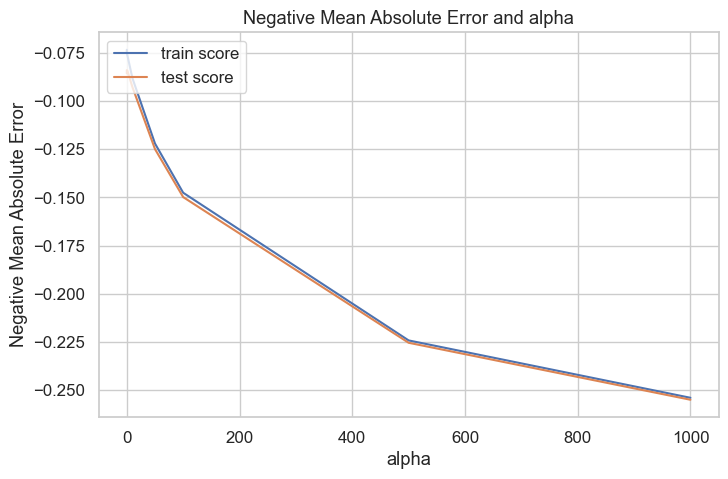

In [118]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [119]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [121]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006268,0.001661,0.002311,0.002136,0.001,{'alpha': 0.001},-0.091577,-0.089632,-0.084038,-0.077187,...,-0.085671,0.005006,5,-0.071622,-0.073075,-0.072933,-0.076155,-0.073164,-0.073390,0.001492
1,0.009326,0.004503,0.003493,0.005175,0.01,{'alpha': 0.01},-0.091421,-0.089524,-0.084070,-0.077025,...,-0.085542,0.005003,3,-0.071653,-0.073082,-0.072928,-0.076208,-0.073221,-0.073418,0.001503
2,0.007856,0.006993,0.008613,0.005237,1.0,{'alpha': 1.0},-0.088983,-0.088503,-0.086722,-0.071728,...,-0.084186,0.006386,1,-0.074718,-0.075701,-0.075465,-0.079429,-0.076068,-0.076276,0.001637
3,0.007913,0.004545,0.001237,0.002473,2.0,{'alpha': 2.0},-0.090070,-0.089200,-0.088720,-0.071599,...,-0.084841,0.006882,2,-0.076547,-0.077435,-0.077156,-0.081243,-0.077956,-0.078067,0.001651
4,0.009378,0.007657,0.003206,0.006411,3.0,{'alpha': 3.0},-0.091365,-0.090409,-0.089980,-0.071812,...,-0.085647,0.007301,4,-0.078073,-0.078845,-0.078631,-0.082599,-0.079401,-0.079510,0.001602
5,0.013459,0.004098,0.003147,0.004203,4.0,{'alpha': 4.0},-0.092750,-0.091666,-0.091130,-0.072410,...,-0.086594,0.007588,6,-0.079466,-0.080120,-0.080022,-0.083955,-0.080816,-0.080876,0.001598
6,0.011757,0.006389,0.004330,0.006110,5.0,{'alpha': 5.0},-0.094088,-0.092954,-0.092142,-0.073224,...,-0.087592,0.007775,7,-0.080812,-0.081390,-0.081347,-0.085230,-0.082230,-0.082202,0.001580
7,0.009361,0.007643,0.006253,0.007658,6.0,{'alpha': 6.0},-0.095469,-0.094131,-0.093057,-0.074046,...,-0.088551,0.007949,8,-0.082056,-0.082592,-0.082629,-0.086451,-0.083571,-0.083460,0.001573
8,0.008153,0.007021,0.007553,0.007005,7.0,{'alpha': 7.0},-0.096893,-0.095191,-0.093978,-0.074959,...,-0.089547,0.008078,9,-0.083294,-0.083748,-0.083858,-0.087614,-0.084828,-0.084668,0.001555
9,0.006250,0.007655,0.010559,0.006099,8.0,{'alpha': 8.0},-0.098296,-0.096281,-0.094913,-0.075935,...,-0.090620,0.008170,10,-0.084480,-0.084855,-0.085082,-0.088753,-0.086078,-0.085849,0.001545


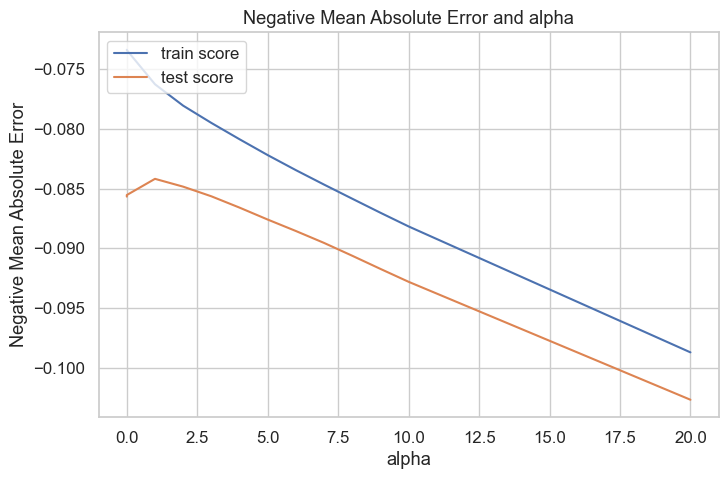

In [122]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Optimal alpha value is between 0 - 2

In [123]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge()
 The best r2 score is obtained at alpha 1.0


### Building ridge regression model with optimal alpha value

In [124]:
# Model building using optimal alpha

ridge = Ridge(alpha = 1.0)
ridge.fit(X_train, y_train)

Ridge()

In [125]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [126]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.288157,10.288157
3,OverallCond,0.521926,0.521926
14,BsmtUnfSF,0.372205,0.372205
2,OverallQual,0.369730,0.369730
34,GarageCars,0.339891,0.339891
11,BsmtFinSF1,0.321087,0.321087
9,BsmtExposure,0.317377,0.317377
74,LotConfig_FR2,-0.300764,0.300764
12,BsmtFinType2,0.291220,0.291220
6,ExterCond,0.261364,0.261364


In [127]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9253
Ridge regression test r2:  0.7506


### Lasso Regression model

In [128]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.110004,0.032526,0.004221,0.005507,0.0001,{'alpha': 0.0001},-0.088445,-0.088481,-0.084890,-0.074477,...,-0.084530,0.005205,1,-0.073944,-0.074975,-0.074529,-0.078518,-0.074973,-0.075388,0.001610
1,0.014218,0.007497,0.005031,0.006461,0.001,{'alpha': 0.001},-0.091186,-0.092817,-0.093581,-0.077080,...,-0.088757,0.006035,2,-0.083813,-0.084249,-0.083781,-0.088433,-0.084241,-0.084903,0.001776
2,0.010082,0.006888,0.003125,0.006250,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,3,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
3,0.003125,0.006251,0.011978,0.006074,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,4,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556
4,0.010782,0.006340,0.003125,0.006249,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


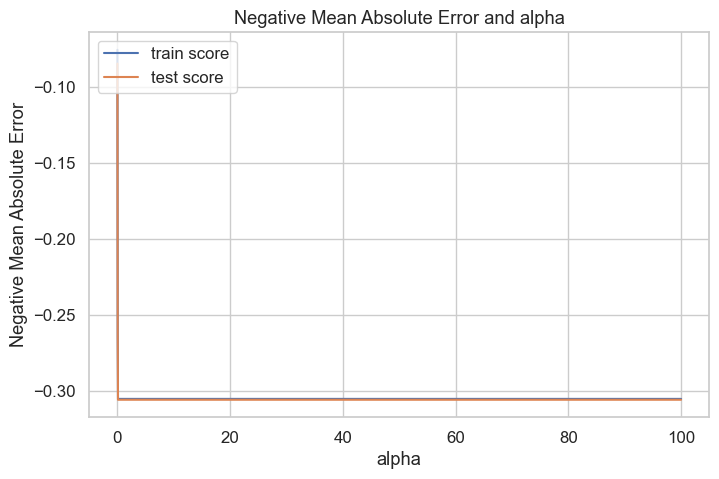

In [130]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

This graph shows that alpha value might be very less than 1

In [131]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011073,0.003992,0.006409,0.001969,0.001,{'alpha': 0.001},-0.091186,-0.092817,-0.093581,-0.077080,...,-0.088757,0.006035,1,-0.083813,-0.084249,-0.083781,-0.088433,-0.084241,-0.084903,0.001776
1,0.009436,0.007706,0.006062,0.007372,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,2,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
2,0.005973,0.004349,0.003725,0.003078,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,3,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556
3,0.001311,0.002621,0.009386,0.007664,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,4,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029
4,0.006944,0.007187,0.006250,0.007655,0.2,{'alpha': 0.2},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,4,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


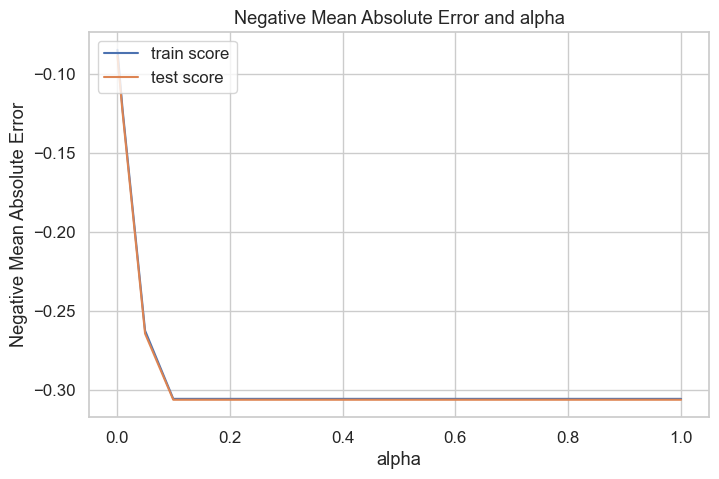

In [133]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [134]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [135]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [136]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.081412,0.016564,0.004645,0.005956,0.0001,{'alpha': 0.0001},-0.088445,-0.088481,-0.084890,-0.074477,...,-0.084530,0.005205,1,-0.073944,-0.074975,-0.074529,-0.078518,-0.074973,-0.075388,0.001610
1,0.015711,0.000164,0.000000,0.000000,0.001,{'alpha': 0.001},-0.091186,-0.092817,-0.093581,-0.077080,...,-0.088757,0.006035,2,-0.083813,-0.084249,-0.083781,-0.088433,-0.084241,-0.084903,0.001776
2,0.006254,0.007660,0.005329,0.006686,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,3,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
3,0.006553,0.008040,0.009376,0.007655,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,4,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556
4,0.012852,0.006462,0.004234,0.006094,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


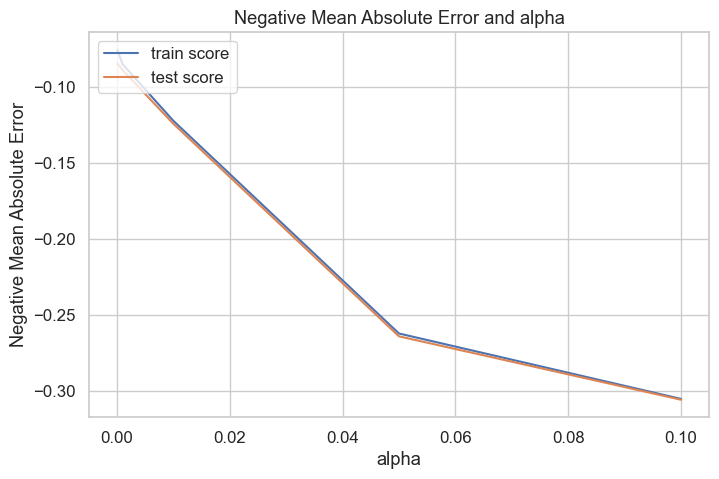

In [137]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [138]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [139]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096868,0.015091,0.003129,0.002871,0.00001,{'alpha': 1e-05},-0.091638,-0.089096,-0.084124,-0.076975,...,-0.085442,0.005004,2,-0.071802,-0.073130,-0.072954,-0.076384,-0.073308,-0.073516,0.001528
1,0.096321,0.010768,0.010691,0.006399,0.0001,{'alpha': 0.0001},-0.088445,-0.088481,-0.084890,-0.074477,...,-0.084530,0.005205,1,-0.073944,-0.074975,-0.074529,-0.078518,-0.074973,-0.075388,0.001610
2,0.013284,0.006719,0.007089,0.007141,0.001,{'alpha': 0.001},-0.091186,-0.092817,-0.093581,-0.077080,...,-0.088757,0.006035,3,-0.083813,-0.084249,-0.083781,-0.088433,-0.084241,-0.084903,0.001776
3,0.012383,0.006538,0.003544,0.007089,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,4,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
4,0.009383,0.005832,0.001202,0.002405,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,5,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556


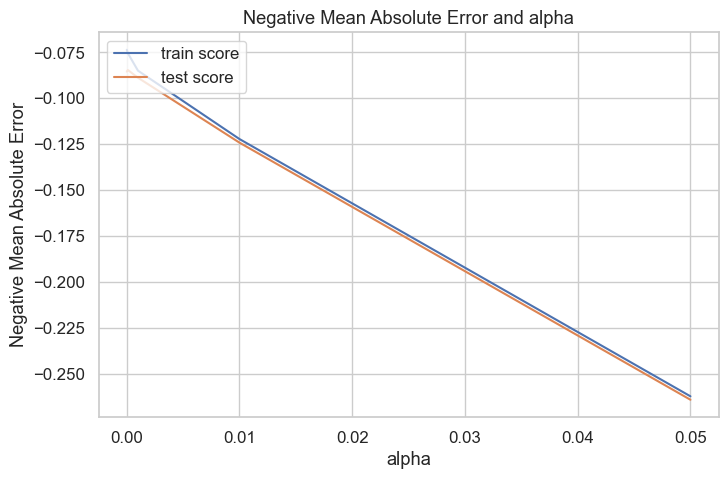

In [140]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [141]:
# Checking the best parameter(alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [143]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.085638,0.025874,0.001554,0.002042,0.00001,{'alpha': 1e-05},-0.091638,-0.089096,-0.084124,-0.076975,...,-0.085442,0.005004,2,-0.071802,-0.073130,-0.072954,-0.076384,-0.073308,-0.073516,0.001528
1,0.091405,0.006440,0.006367,0.007576,0.0001,{'alpha': 0.0001},-0.088445,-0.088481,-0.084890,-0.074477,...,-0.084530,0.005205,1,-0.073944,-0.074975,-0.074529,-0.078518,-0.074973,-0.075388,0.001610
2,0.021078,0.006041,0.002451,0.003026,0.001,{'alpha': 0.001},-0.091186,-0.092817,-0.093581,-0.077080,...,-0.088757,0.006035,3,-0.083813,-0.084249,-0.083781,-0.088433,-0.084241,-0.084903,0.001776


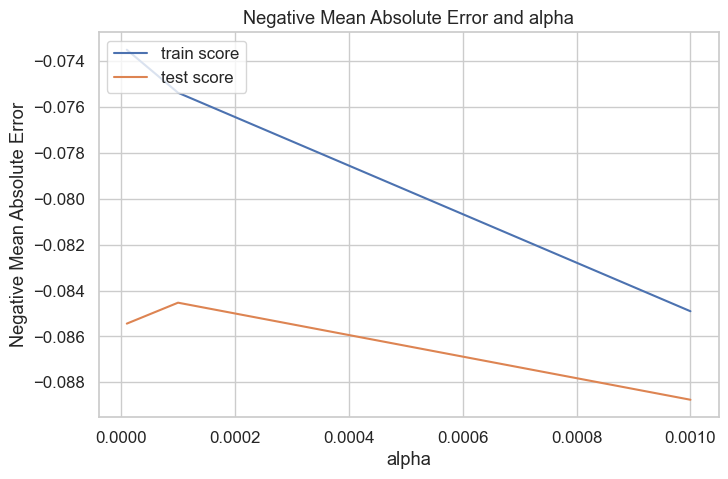

In [145]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [146]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

### Building Lasso regression model with optimal alpha value

In [147]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9266887995040425
Lasso Regression test r2: 0.7436808576513196


In [148]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [149]:
lasso_coef

,Feature,Coef,mod
0,LotFrontage,10.203307,10.203307
1,LotArea,0.147045,0.147045
2,OverallQual,0.538626,0.538626
3,OverallCond,0.560926,0.560926
4,ExterCond,0.127160,0.127160
5,BsmtFinSF1,-0.055394,0.055394
6,BsmtFinSF2,0.148580,0.148580
7,BsmtUnfSF,0.000784,0.000784
8,TotalBsmtSF,-0.000000,0.000000
9,CentralAir,0.511163,0.511163


In [150]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.203307,10.203307
14,BsmtFullBath,0.767549,0.767549
3,OverallCond,0.560926,0.560926
74,Exterior1st_CBlock,-0.546687,0.546687
2,OverallQual,0.538626,0.538626
9,CentralAir,0.511163,0.511163
34,MSZoning_RH,0.430823,0.430823
36,MSZoning_RM,0.331955,0.331955
37,Street_Pave,0.288053,0.288053
22,WoodDeckSF,0.256840,0.256840


In [151]:
lasso.coef_

array([ 0.14704526,  0.53862567,  0.56092629,  0.12715963, -0.05539358,
        0.1485795 ,  0.00078415, -0.        ,  0.5111626 ,  0.09314496,
        0.04600959,  0.10518166, -0.02899893,  0.76754935,  0.07448588,
        0.10056987,  0.07523258, -0.11186136,  0.08251497,  0.1650292 ,
        0.24684277,  0.25683994,  0.0764719 ,  0.06430939, -0.1232883 ,
       -0.05048894, -0.0503913 , -0.02655651,  0.        , -0.06300302,
       -0.12135564, -0.0149663 , -0.03257744,  0.43082253,  0.23481101,
        0.33195498,  0.28805251,  0.06448552, -0.02161746, -0.09582989,
       -0.07303902,  0.12196402, -0.09031352,  0.07793773, -0.07807882,
        0.115226  ,  0.08417523, -0.09616101,  0.04285536,  0.03873495,
        0.03658733,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.00243305,  0.0760971 ,  0.05837889,
        0.03049207,  0.05227435, -0.08486911, -0.01266291, -0.07558773,
       -0.07970312,  0.00992731,  0.1637674 ,  0.        , -0.  

##  Data Modeling and evaluation - Final model

In [152]:
# We have used lasso for building the model as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9266887995040425
0.7436808576513196


## Conclusion

### 
    
- LotFrontage :  If the house Linear feet of street connected to property area increase then the Price increases.
    
- BsmtFullBath	: :  If the BsmtFullBath area is more then the SalePrice is higher
    
- Overall Condition: If the Overall Condition is Excellent the SalePrice is higher
    
- MSZoning_RH : If the house i near residential area then the SalePrice is higher
    
- Overall quality: If the Overall Condition is Excellent the SalePrice is higher
    
- Exterior1st_CBlock : IF the house  Exterior1st is CBlock then price is less.
    
- Garage Area: If the Garage area is high the SalePrice is higher
    
- CentralAir: If the CentralAir is Yes the SalePrice is higher

    
- These are the variables which can potentially help the company to make a business decison


### Optimal value of alpha:
1. For Ridge regression :1.0
2. For Lasso Regression :0.0001

##  Subjective Questions

Question 1: Double the alpha values and evaluate model

 For Ridge regression aplha is 1.0 and now doubling it and making it 2.0

In [153]:
# Model building using optimal alpha
ridge_modified = Ridge(alpha=2.0)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=2.0)

In [154]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.288157,10.288157
3,OverallCond,0.521926,0.521926
14,BsmtUnfSF,0.372205,0.372205
2,OverallQual,0.369730,0.369730
34,GarageCars,0.339891,0.339891
11,BsmtFinSF1,0.321087,0.321087
9,BsmtExposure,0.317377,0.317377
74,LotConfig_FR2,-0.300764,0.300764
12,BsmtFinType2,0.291220,0.291220
6,ExterCond,0.261364,0.261364


In [155]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.9214597924295557
Ridge Regression test r2: 0.7570185923060789


For Lasso regression alpha is 0.0001 and not doubling it and making it 0.0002

In [156]:
# Model building using optimal alpha
lasso_modified = Lasso(alpha=0.0002)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [157]:

y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9231076808114981
Lasso Regression test r2: 0.7481220961411523


In [158]:

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']


In [159]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.203307,10.203307
14,BsmtFullBath,0.767549,0.767549
3,OverallCond,0.560926,0.560926
74,Exterior1st_CBlock,-0.546687,0.546687
2,OverallQual,0.538626,0.538626
9,CentralAir,0.511163,0.511163
34,MSZoning_RH,0.430823,0.430823
36,MSZoning_RM,0.331955,0.331955
37,Street_Pave,0.288053,0.288053
22,WoodDeckSF,0.256840,0.256840


Question 3: Double the alpha values and evaluate model

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Droping the first five important predictors

In [160]:
X_train_new = X_train.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)
X_test_new = X_test.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)

X_test_new.head()
X_train_new.shape

(988, 85)

In [161]:
X_test_new.shape

(424, 85)

In [162]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [163]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057463,0.024828,0.000309,0.000618,0.0001,{'alpha': 0.0001},-0.102788,-0.099543,-0.092109,-0.085333,...,-0.094357,0.006164,1,-0.081390,-0.082769,-0.083492,-0.087434,-0.083982,-0.083814,0.002010
1,0.013934,0.007313,0.007499,0.007021,0.001,{'alpha': 0.001},-0.107975,-0.107026,-0.101833,-0.084297,...,-0.099872,0.008555,2,-0.092611,-0.093978,-0.095202,-0.098358,-0.095131,-0.095056,0.001901
2,0.005594,0.002694,0.003612,0.003010,0.01,{'alpha': 0.01},-0.145035,-0.147623,-0.138726,-0.121165,...,-0.137075,0.009471,3,-0.135526,-0.133150,-0.135207,-0.136931,-0.133240,-0.134811,0.001442


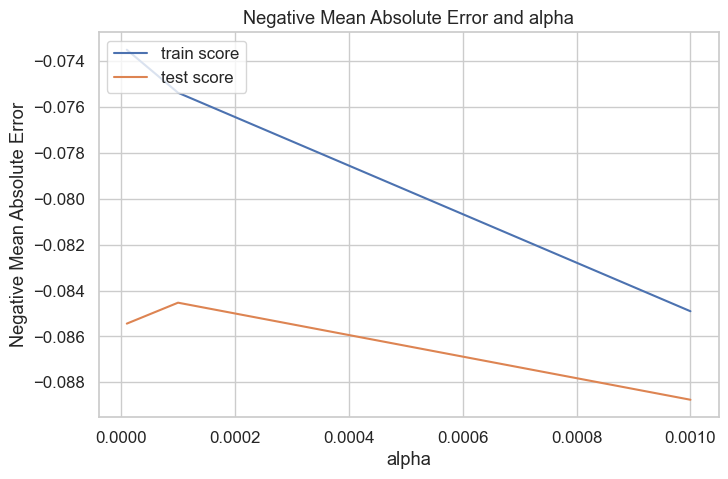

In [164]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [165]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [166]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9115815550395492
Lasso Regression test r2: 0.7085311961814886


In [167]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [168]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotArea,10.323473,10.323473
10,FullBath,0.993013,0.993013
1,ExterCond,0.619948,0.619948
6,1stFlrSF,0.606468,0.606468
29,MSZoning_RH,0.563716,0.563716
